In [2]:
import numpy as np
import sympy 
import matplotlib.pyplot as plt

# 1. Linear Independence

Below we write a function `linear_dep_test` which tests for linear dependence of a square matrix by using determinants. In particular, we assume that the matrix is $4\times 4$ and contains integers values only. 

In [115]:
u_vec = np.random.randint(1,1000,4)
v_vec = np.random.randint(1,1000,4)
w_vec = np.random.randint(1,1000,4)
z_vec = np.random.randint(1,1000,4)

def linear_dep_test(u_vec,v_vec,w_vec,z_vec):
    
    B = np.row_stack([u_vec, v_vec, w_vec, z_vec])
    print('B = \n', B)
    
    rows = len(B)
    columns = len(B[0])
    
    if rows != columns:
        raise Exception('B must be square')
        
    if rows != 4:
        raise Exception('Dimension of B must be 4')
    
    det = np.linalg.det(B)
    
    print('\n determinant of B is: ', int(det))
    
    if int(det) == 0:
        print('\n u, v, w, and z are linearly dependent')
    else:
        print('\n u, v, w, and z are linearly independent') 

linear_dep_test(u_vec,v_vec,w_vec,z_vec)

B = 
 [[407 420 778 472]
 [318 773 876 459]
 [653 793 484 403]
 [917  45 385  95]]

 determinant of B is:  62422193856

 u, v, w, and z are linearly independent


# 2. Linear Regression 

We display an example of simple linear regrassion using sample data obtained from https://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt. Specifically, we use the first 16 points to perform one-dimensional linear regression, where the x-values correspond to age of participant, and each y-value corresponds to the blood pressure of the respective x-value. It should be noted that this set is not reflective of the whole data set, as there were a total of 30 points in total from the original data set. 

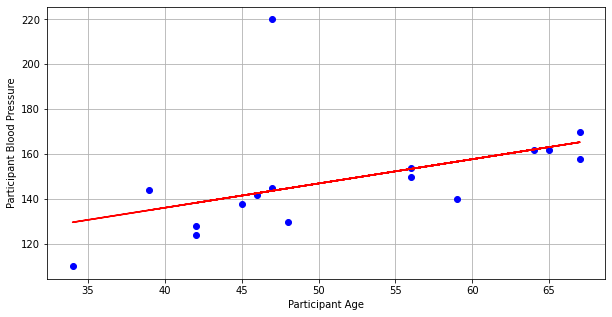

Correlation Coefficient:  0.4631695042319622
Coefficient of Determination:  0.21452598965048164


In [8]:
x = np.array([39,47,45,47,65,46,67,42,67,56,64,56,59,34,42,48]) # reshape accordingly
y = np.array([144,220,138,145,162,142,170,124,158,154,162,150,140,110,128,130]) # corresponds to blood pressure
    
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
    
beta_1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
    
beta_0 = y_mean - (beta_1*x_mean)
    
def coerr_coeff(x,y):
    
    # compute Pearson's coerrelation coefficient
    
    n = len(x)
    
    coeff = (n*sum(x*y) - sum(x)*(sum(y)))/(np.sqrt( (n*sum(x**2) - sum(x)**2 ) * (n*sum(y**2) - sum(y)**2)))
                                            
    return coeff

# plot results

coeffs = coerr_coeff(x,y)
plt.figure(figsize = (10,5))
plt.plot(x,y, 'bo')
plt.xlabel('Participant Age')
plt.ylabel('Participant Blood Pressure')
plt.plot(x, beta_0 + beta_1*x, 'r-')
plt.grid()
plt.show()

print('Correlation Coefficient: ', coeffs)
print('Coefficient of Determination: ', coeffs**2)